In [234]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import MinMaxScaler
from dynamics import *
import re
import math
from optread import *
from scipy.stats import binom
#set latex font for plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
# Precompute embeddings for all readouts
def precompute_embeddings(datapoints_normalized):
    simulator = RydbergSimulator(
        nsites=nsites,
        atoms=atoms,
        readouts=readouts,
        omega=omega,
        t_start=t_start,
        t_end=t_end,
        t_step=t_step,
        t_rate=t_rate,
        alpha=alpha,
        V_matrix=V_matrix,
        id=0,
        use_wavelet=False
    )
    embeddings = simulator.apply_layer(datapoints_normalized)
    return readouts, embeddings

In [266]:
# Generate regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=402)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler_X.fit_transform(X)
y = y.reshape(-1, 1)  # Reshape y to a 2D array for normalization
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_normalized = scaler_y.fit_transform(y).flatten() 

# First, split into 60% train and 40% temp (test + val)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_normalized, y_normalized, test_size=0.4, shuffle=True, random_state=402
)
# Next, split the remaining 40% equally into test (20%) and validation (20%)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=True, random_state=402
)

In [267]:
#use a simple random forest classifier
clf = RandomForestRegressor(n_estimators=50, random_state=402)
clf.fit(X_train, y_train)
#accuracy
y_pred = clf.predict(X_test)
base_mse = mean_squared_error(y_test, y_pred)
print('Base Test MSE: {}'.format(base_mse))

Base Test MSE: 0.0026597056146885744


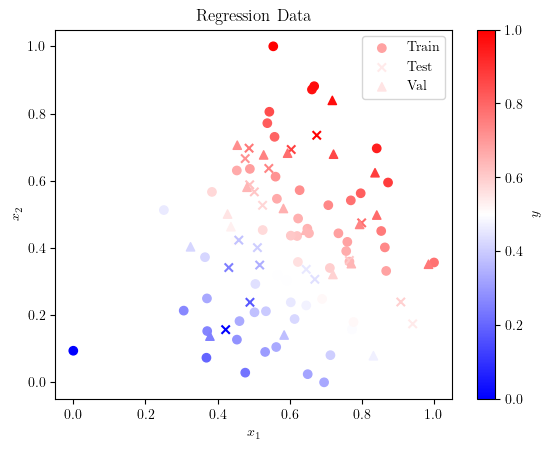

In [269]:
DATA_DIR = '/DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression'
os.makedirs(DATA_DIR, exist_ok=True)
#using bwr cmap plot the regression data x_1 vs x_2 with the color representing the target value
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', label='Train', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', label='Test', marker='x')
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr', label='Val', marker='^')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Regression Data')
#set colorbar ticks from 0.0 to 1.0
plt.clim(0.0, 1.0)
#set colorbar label to '$y$'
plt.colorbar().set_label(r'$y$')
plt.legend()

#Save the pdf
plt.savefig(DATA_DIR+'/regression_data.pdf', bbox_inches='tight')
plt.show()

In [270]:
#save the regression data as npy files
np.save(DATA_DIR+'/X_train.npy', X_train)
np.save(DATA_DIR+'/y_train.npy', y_train)
np.save(DATA_DIR+'/X_test.npy', X_test)
np.save(DATA_DIR+'/y_test.npy', y_test)
np.save(DATA_DIR+'/X_val.npy', X_val)
np.save(DATA_DIR+'/y_val.npy', y_val)

Generating Embeddings:   0%|          | 0/9 [00:00<?, ?it/s]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_2.pdf


Generating Embeddings:  11%|█         | 1/9 [00:24<03:19, 24.95s/it]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_3.pdf


Generating Embeddings:  22%|██▏       | 2/9 [00:51<03:00, 25.80s/it]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_4.pdf


Generating Embeddings:  33%|███▎      | 3/9 [01:24<02:56, 29.36s/it]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_5.pdf


Generating Embeddings:  44%|████▍     | 4/9 [02:08<02:53, 34.77s/it]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_6.pdf


Generating Embeddings:  56%|█████▌    | 5/9 [03:03<02:48, 42.23s/it]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_7.pdf


Generating Embeddings:  67%|██████▋   | 6/9 [04:09<02:30, 50.32s/it]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_8.pdf


Generating Embeddings:  78%|███████▊  | 7/9 [05:43<02:09, 64.52s/it]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_9.pdf


Generating Embeddings:  89%|████████▉ | 8/9 [09:24<01:54, 114.53s/it]

Plot saved as /DISK/[Team]QAI/Shehbaz/WAIR-D_QRC/QuantumDynamics/cudaq-qrc/data/regression/lattice_plot_10.pdf


Generating Embeddings: 100%|██████████| 9/9 [26:59<00:00, 179.96s/it]


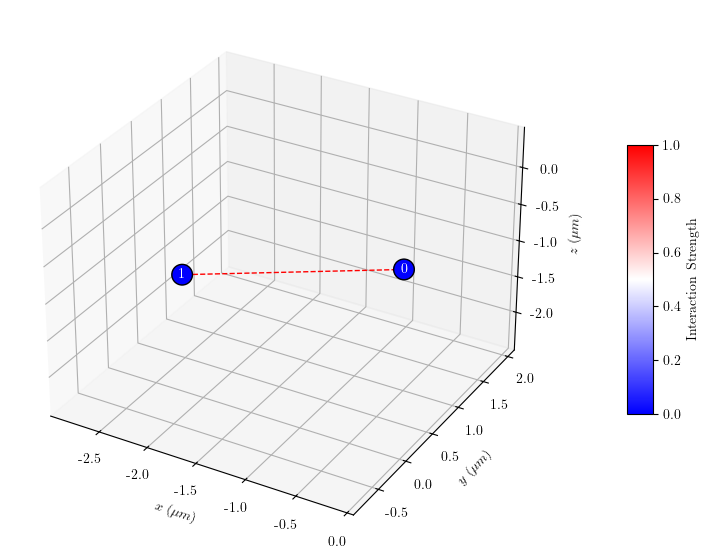

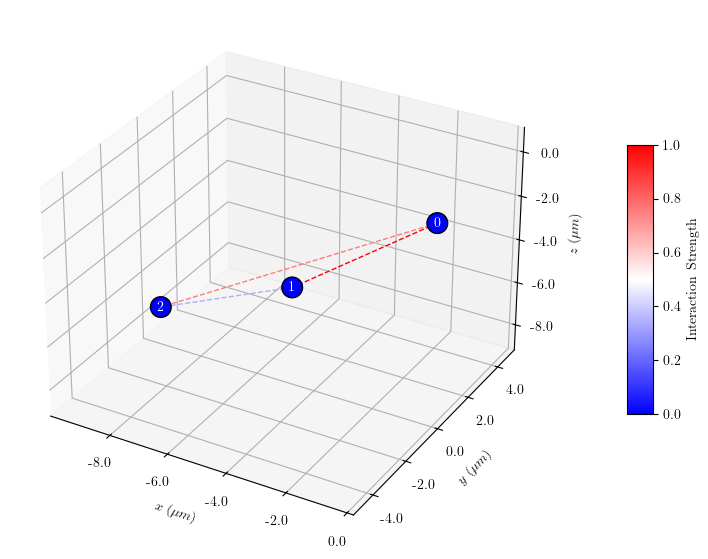

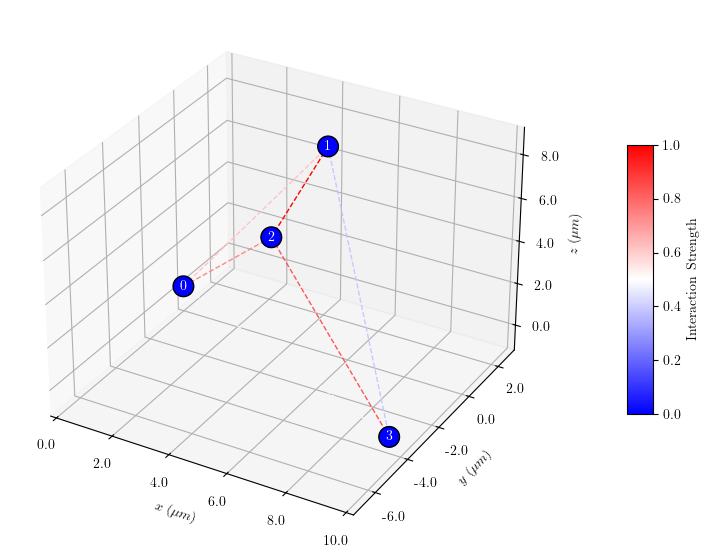

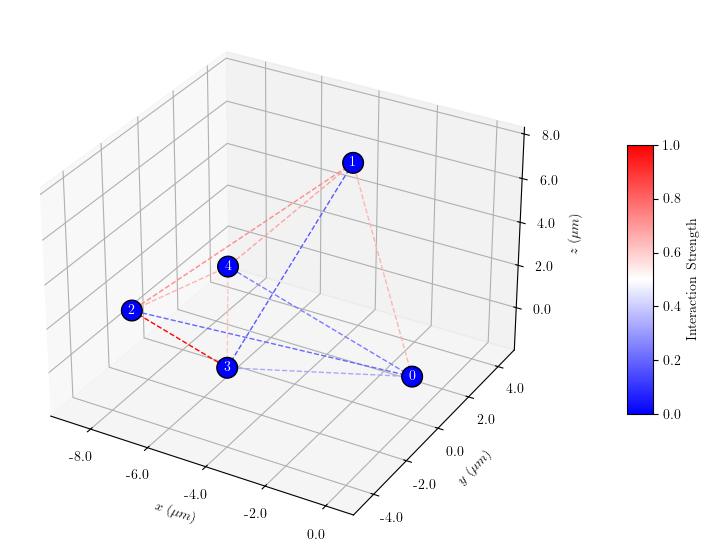

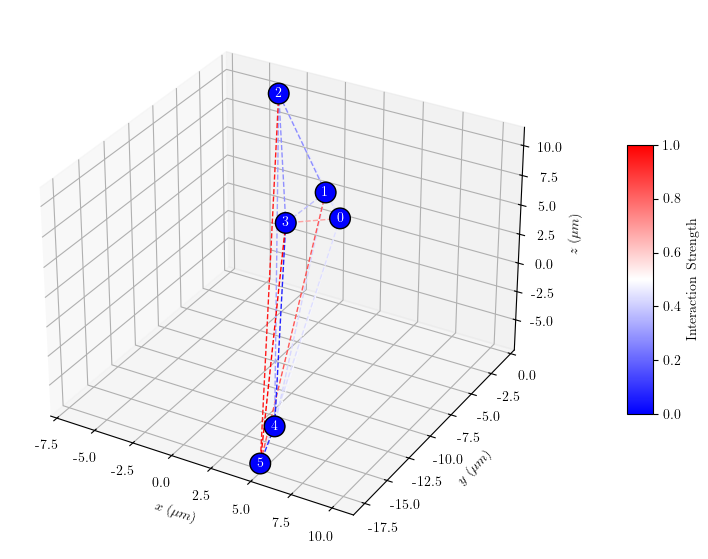

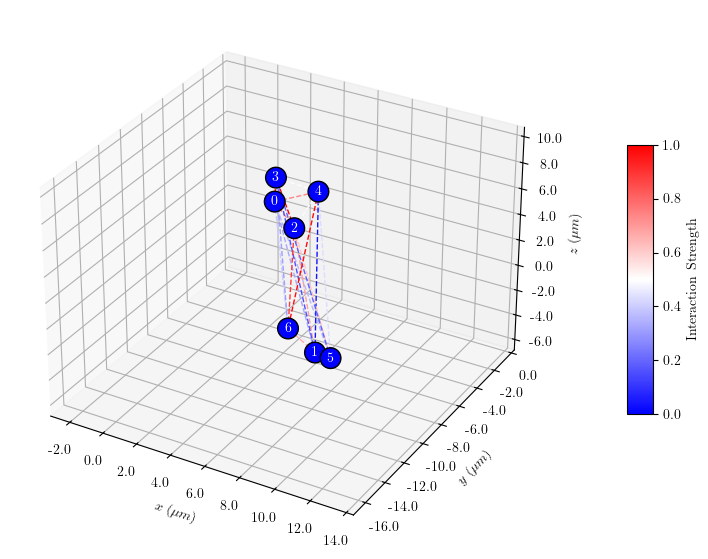

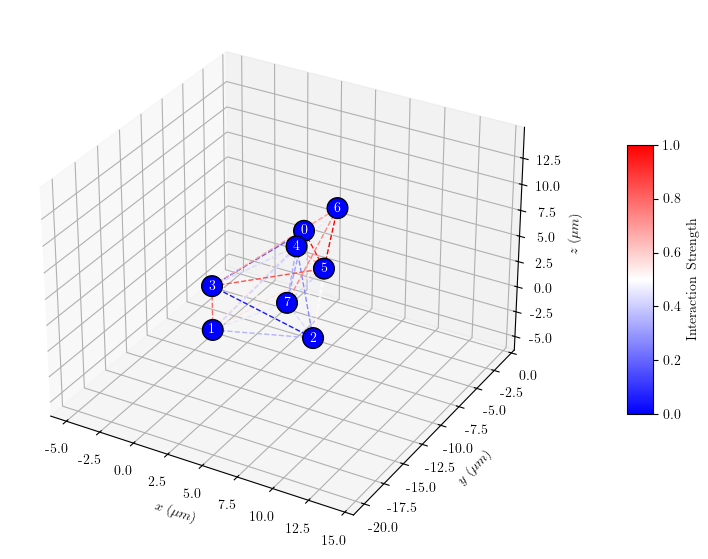

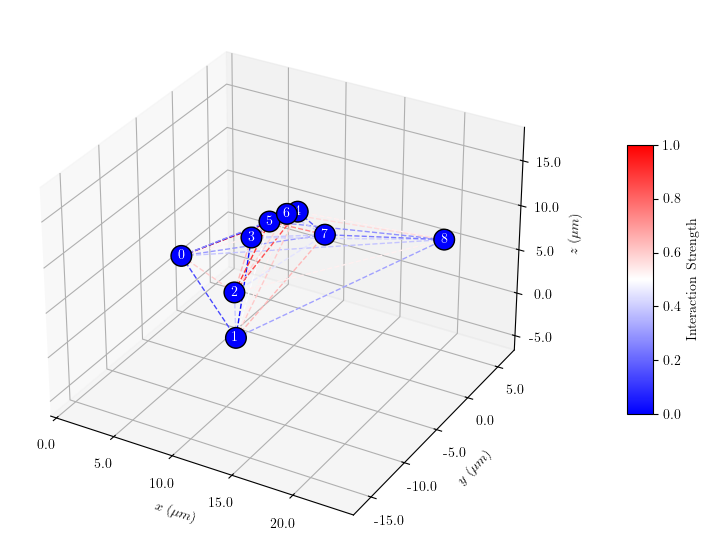

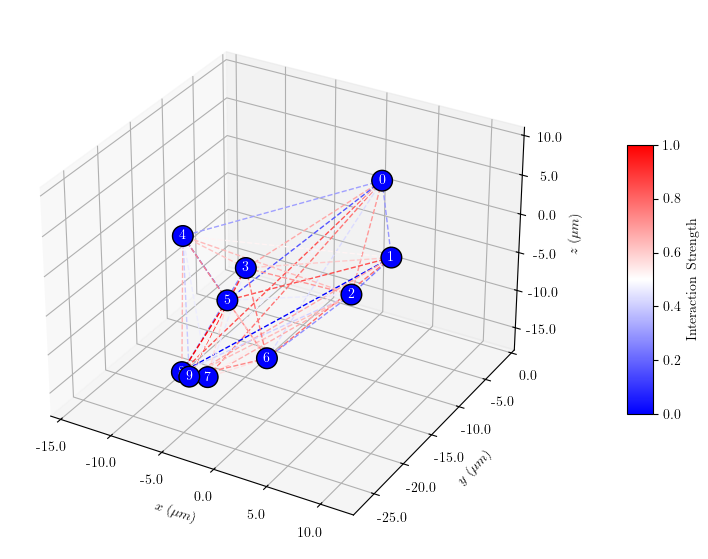

In [271]:
np.random.seed(2)
from tqdm import tqdm
for nsites in tqdm(range(2, 11), desc='Generating Embeddings'):
    d = 10 # 10 micron spacing
    atoms = np.linspace(0, (nsites - 1) * d, nsites)  # Put atoms in a chain with 10 micron spacing

    # Hyperparameters for testing
    omega = 2 * np.pi
    t_start = 0.0
    t_end = 3.0
    t_step = 0.5
    t_rate = 1.0
    alpha = np.random.rand(nsites)  # Random site modulation factors between 0 and 1
    V_matrix = np.random.rand(nsites, nsites)
    V_matrix = (V_matrix + V_matrix.T) / 2  # Make the interaction matrix symmetric
    np.fill_diagonal(V_matrix, 0.1)  # Set diagonal elements to 0.1
    #use min-max normalization

    # Call the function
    plot_3d_lattice(nsites, d, atoms, alpha, V_matrix, save_as_pdf=True, filename=DATA_DIR+f"/lattice_plot_{nsites}.pdf")

    scaler = MinMaxScaler(feature_range=(-1, 1))
    train_datapoints_normalized = scaler.fit_transform(X_train)
    val_datapoints_normalized = scaler.transform(X_val)
    test_datapoints_normalized = scaler.transform(X_test)
    #custom_readouts = ["IIIZII","ZIIIII","IZIIII","XXXIII","IIIXXX","IIIIIX"]

    #readouts = generate_readouts(nsites, custom_readouts)
    readouts = generate_readouts(nsites)  #default readouts

    _, train_embeddings = precompute_embeddings(train_datapoints_normalized)
    _, val_embeddings = precompute_embeddings(val_datapoints_normalized)
    _, test_embeddings = precompute_embeddings(test_datapoints_normalized)


    train_embeddings=train_embeddings/(2**nsites) #normalize embeddings
    val_embeddings=val_embeddings/(2**nsites) #normalize embeddings
    test_embeddings=test_embeddings/(2**nsites) #normalize embeddings

    #save them as npy files
    np.save(DATA_DIR+f'/train_embeddings_{nsites}.npy', train_embeddings)
    np.save(DATA_DIR+f'/val_embeddings_{nsites}.npy', val_embeddings)
    np.save(DATA_DIR+f'/test_embeddings_{nsites}.npy', test_embeddings)
    

100%|██████████| 20/20 [00:10<00:00,  1.85it/s]


In [250]:
qrcf_mses = []
for nsites in tqdm(range(2, 11), desc='Training QRC Full'):
    train_embeddings = np.load(DATA_DIR+f'/train_embeddings_{nsites}.npy')
    val_embeddings = np.load(DATA_DIR+f'/val_embeddings_{nsites}.npy')
    test_embeddings = np.load(DATA_DIR+f'/test_embeddings_{nsites}.npy')
    y_train = np.load(DATA_DIR+'/y_train.npy')
    y_val = np.load(DATA_DIR+'/y_val.npy')
    y_test = np.load(DATA_DIR+'/y_test.npy')

    #check the mse of the embeddings
    clf = RandomForestRegressor(n_estimators=50, random_state=402)
    clf.fit(train_embeddings, y_train)
    #accuracy   
    y_pred = clf.predict(test_embeddings)
    qrcf_mse = mean_squared_error(y_test, y_pred)
    qrcf_mses.append(qrcf_mse)
    print(f'QRC Full MSE ({nsites}): {qrcf_mse}')

QRC Full MSE: 0.00010758030175856496


In [251]:
t_steps = np.arange(t_start+t_step, t_end+t_step, t_step)
#reshape the embeddings to be in the shape of (n_samples, len(t_steps), :))
embd_per_t = train_embeddings.reshape(train_embeddings.shape[0], len(t_steps), -1)
embd_per_t_val = val_embeddings.reshape(val_embeddings.shape[0], len(t_steps), -1)
embd_per_t_test = test_embeddings.reshape(test_embeddings.shape[0], len(t_steps), -1)

The original value of the sample is:  [0.8673836  0.33151251]


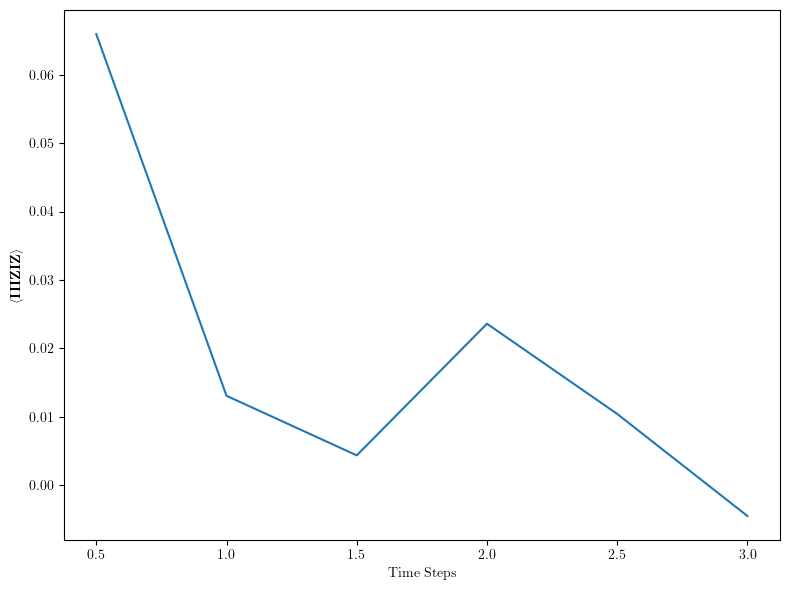

In [252]:
# Sample Index and Readout Index
sample_idx = 0
readout_idx = 101  # Specify the readout index to visualize

print("The original value of the sample is: ", X_train[sample_idx])

# Plot specific readout
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t_steps, embd_per_t[sample_idx, :, readout_idx])

# Convert readout string to LaTeX with braket notation
readout = readouts[readout_idx].to_string()
title = re.search(r"[IXYZ]+", readout).group()
latex_title = f"$\\langle \\mathbf{{{title}}} \\rangle$"

ax.set_xlabel('Time Steps')
ax.set_ylabel(latex_title)
plt.tight_layout()
plt.show()

In [253]:
#optimize the feature selection on observable selections (readouts) (reasonable performance but faster)
retention = int(len(embd_per_t[0]))
results = genetic_algorithm_feature_selection(
    embd_per_t, embd_per_t_val, y_train, y_val,
    base_mse=base_mse,
    qrc_full_mse=qrc_full_mse,
    model=clf,
    pop_size=25,
    n_gen=100,
    crossover_rate=0.7,
    mutation_rate=0.2,
    elitism_count=2,
    n_jobs=-1,
    max_features_selected=retention
)

Iteration 1/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0001
Iteration 2/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0001
Iteration 3/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0001
Iteration 4/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 5/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 6/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 7/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 8/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 9/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 10/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 11/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 12/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 13/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
Iteration 14/100: base_mse=0.0027, qrc_full_mse=0.0001, best_mse=0.0000
I

In [255]:
# final results is a list of dicts for each iteration
# The last entry has the best overall
final_info = results[-1]
print("\n=== FINAL GA RESULTS ===")
print(f"Iteration: {final_info['iteration']}")
print(f"Best val MSE: {final_info['best_mse']:.8f}")
best_mask = final_info['best_mask']
#print("Features selected:", np.where(best_mask == 1)[0])
#print selcted feature out of tiotal features
selected_features = np.where(best_mask == 1)[0]
print(f'The selected embeddings are of shape: {train_embeddings[:,selected_features].shape}')


=== FINAL GA RESULTS ===
Iteration: 100
Best val MSE: 0.00002529
The selected embeddings are of shape: (60, 6)


In [256]:
regressor_QRC = clf
regressor_QRC.fit(train_embeddings[:,selected_features], y_train)
train_preds_QRC = regressor_QRC.predict(train_embeddings[:,selected_features])
test_preds_QRC = regressor_QRC.predict(test_embeddings[:,selected_features])
#the improvement in mse
improvement = (base_mse - mean_squared_error(y_test, test_preds_QRC)) / base_mse * 100
print('QRC Test MSE: {}'.format(mean_squared_error(y_test, test_preds_QRC)))
print('QRC Improvement: {:.2f}%'.format(improvement))

QRC Test MSE: 0.002269195915270452
QRC Improvement: 14.68%


In [257]:
#optimize the feature selection on the full embeddings (performance is good but slow)
retention = int(len(train_embeddings[0])*0.25) #only keep 25% of the features
results = genetic_algorithm_feature_selection(
    train_embeddings, val_embeddings, y_train, y_val,
    base_mse=base_mse,
    qrc_full_mse=qrc_full_mse,
    model=clf,
    pop_size=25,
    n_gen=100,
    crossover_rate=0.7,
    mutation_rate=0.2,
    elitism_count=2,
    n_jobs=-1,
    max_features_selected=retention
)

Iteration 1/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00011939
Iteration 2/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00009625
Iteration 3/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00008262
Iteration 4/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00008262
Iteration 5/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00008262
Iteration 6/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00007068
Iteration 7/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00006906
Iteration 8/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00006906
Iteration 9/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00006906
Iteration 10/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00006906
Iteration 11/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00006906
Iteration 12/100: base_mse=0.00265971, qrc_full_mse=0.00010758, best_mse=0.00006515
I

In [259]:
results_dict = {}
final_info = results[-1]
best_mse = final_info['best_mse']
final_info = results[-1]
best_mask = final_info['best_mask']
improvement = (base_mse - best_mse) / base_mse * 100

results_dict[nsites] = {
    "nsites": nsites,
    "qrc_mse": qrc_full_mse,
    "best_mse": best_mse,
    "best_mask": best_mask,
    "selected_features": np.where(best_mask == 1)[0],
    "length_selected_features": len(np.where(best_mask == 1)[0]),
    "original_length": len(train_embeddings[0]),
    "improvement": improvement
}

# final results is a list of dicts for each iteration
# The last entry has the best overall
final_info = results[-1]
print("\n=== FINAL GA RESULTS ===")
print(f"Iteration: {final_info['iteration']}")
print(f"Best MSE: {final_info['best_mse']:.8f}")
best_mask = final_info['best_mask']
#print("Features selected:", np.where(best_mask == 1)[0])
#print selcted feature out of tiotal features
selected_features = np.where(best_mask == 1)[0]
print(f'The selected embeddings are of shape: {train_embeddings[:,selected_features].shape}')


=== FINAL GA RESULTS ===
Iteration: 100
Best MSE: 0.00004877
The selected embeddings are of shape: (60, 162)


In [260]:
regressor_QRC = clf
regressor_QRC.fit(train_embeddings[:,selected_features], y_train)
train_preds_QRC = regressor_QRC.predict(train_embeddings[:,selected_features])
test_preds_QRC = regressor_QRC.predict(test_embeddings[:,selected_features])
#the improvement in mse
improvement = (base_mse - mean_squared_error(y_test, test_preds_QRC)) / base_mse * 100
print('QRC Test MSE: {}'.format(mean_squared_error(y_test, test_preds_QRC)))
print('QRC Improvement: {:.2f}%'.format(improvement))

QRC Test MSE: 8.495157106249821e-05
QRC Improvement: 96.81%
